# 🎯 Facial Emotion Recognition using Convolutional Neural Networks (CNN)

This project builds a deep learning pipeline for **Facial Emotion Recognition** using Convolutional Neural Networks (CNN). The model classifies facial images into **7 distinct emotions**:  

😠 **Anger** | 😒 **Contempt** | 🤢 **Disgust** | 😨 **Fear** | 😄 **Happiness** | 😢 **Sadness** | 😲 **Surprise**  

The system leverages computer vision and machine learning techniques to analyze facial expressions and predict emotional states.

---

## 📂 Dataset: Facial Emotion Recognition Faces

The dataset consists of images capturing people displaying **7 distinct emotions**.  

Each image represents one specific emotion, enabling researchers and machine learning practitioners to study and develop models for emotion recognition and analysis.  

### 🌍 Dataset Highlights:
- ✅ Includes a **diverse range of individuals**:
  - Genders
  - Ethnicities
  - Age groups
- ✅ Provides a **comprehensive representation of human emotions**
- ✅ Ideal for training, testing, and validating deep learning models

### 💼 Commercial Usage:
To discuss your requirements, learn about pricing, and purchase the dataset, submit a request on **TrainingData**.

---

## 🚀 Applications
This project and dataset can be applied in the following areas:  
- 🎭 **Automatic Emotion Detection**
- 🧠 **Mental Health Analysis**
- 🤖 **Artificial Intelligence (AI) and Computer Vision**
- 🎬 **Entertainment Industries**
- 📊 **Advertising and Market Research**
- 🛡️ **Security and Surveillance**

---

## 🛠 Project Workflow

### 1️⃣ Data Preprocessing
- Images resized to **48x48 pixels** for efficient processing
- Converted to grayscale
- Labels encoded and one-hot encoded for classification

### 2️⃣ Exploratory Data Analysis (EDA)
- Visualized **gender distribution, age distribution, country distribution**
- Created correlation heatmaps and boxplots for demographic insights

### 3️⃣ Model Architecture
A deep learning model using CNN layers for feature extraction:  
- **Convolutional Layers**: Detect features in facial images
- **Pooling Layers**: Downsample feature maps
- **Fully Connected Dense Layers**: Classify emotions
- **Dropout**: Prevent overfitting
- **Softmax Activation**: Output probability distribution across 7 emotions

### 4️⃣ Training and Evaluation
- Model trained using **Categorical Crossentropy Loss** and **Adam Optimizer**
- Tracked accuracy and loss across 20 epochs
- Evaluated with a **Confusion Matrix** and **Classification Report**

### 5️⃣ Results Visualization
- Plotted training vs validation accuracy and loss
- Displayed test images with **actual** and **predicted labels**

---

## 🏆 Key Achievements
- Achieved **high accuracy** on validation data  
- Balanced predictions across all 7 emotion classes  
- Successfully visualized model performance with clear metrics

---

## 📊 Future Improvements
- 🔁 Data Augmentation for improved generalization
- 🧠 Leverage Transfer Learning (e.g., ResNet, MobileNet) for better performance
- 🌐 Deploy as a **web or mobile app** for real-time emotion detection
- 🎥 Implement **live webcam emotion recognition**

---

## 👨‍💻 Author : Nieveatha
Developed and tested in **Google Colab** using Python, TensorFlow, and OpenCV.  

---



In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
DATA_DIR = '/content/drive/MyDrive/archive (4).zip'

In [9]:
from google.colab import files
uploaded = files.upload()

Saving archive (4).zip to archive (4).zip


In [10]:
import zipfile

zip_path = '/content/archive (4).zip'  # Colab stores uploads in /content/
extract_dir = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted!")

Extracted!


In [11]:
import os

# List extracted files
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        print(os.path.join(root, file))

/content/dataset/emotions.csv
/content/dataset/images/6/Contempt.jpg
/content/dataset/images/6/Fear.jpg
/content/dataset/images/6/Disgust.jpg
/content/dataset/images/6/Sad.jpg
/content/dataset/images/6/Anger.jpg
/content/dataset/images/6/Surprised.jpg
/content/dataset/images/6/Neutral.jpg
/content/dataset/images/6/Happy.jpg
/content/dataset/images/7/Contempt.jpg
/content/dataset/images/7/Fear.jpg
/content/dataset/images/7/Disgust.jpg
/content/dataset/images/7/Sad.jpg
/content/dataset/images/7/Anger.jpg
/content/dataset/images/7/Surprised.jpg
/content/dataset/images/7/Neutral.jpg
/content/dataset/images/7/Happy.jpg
/content/dataset/images/0/Contempt.jpg
/content/dataset/images/0/Fear.jpg
/content/dataset/images/0/Disgust.jpg
/content/dataset/images/0/Sad.jpg
/content/dataset/images/0/Anger.jpg
/content/dataset/images/0/Surprised.jpg
/content/dataset/images/0/Neutral.jpg
/content/dataset/images/0/Happy.jpg
/content/dataset/images/14/Contempt.jpg
/content/dataset/images/14/Fear.jpg
/conte

In [12]:
csv_path = '/content/dataset/emotions.csv'
emotions_df = pd.read_csv(csv_path)

In [13]:
IMG_SIZE = 48
DATA_DIR = '/content/dataset'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
csv_path = '/content/dataset/emotions.csv'

# Load the dataset
import pandas as pd
emotions_df = pd.read_csv(csv_path)
print(emotions_df.head())

   set_id  gender  age country
0       0  FEMALE   36      RU
1       1  FEMALE   37      RU
2       2  FEMALE   36      RU
3       3    MALE   29      RU
4       4  FEMALE   43      RU


In [14]:
emotions_df['set_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

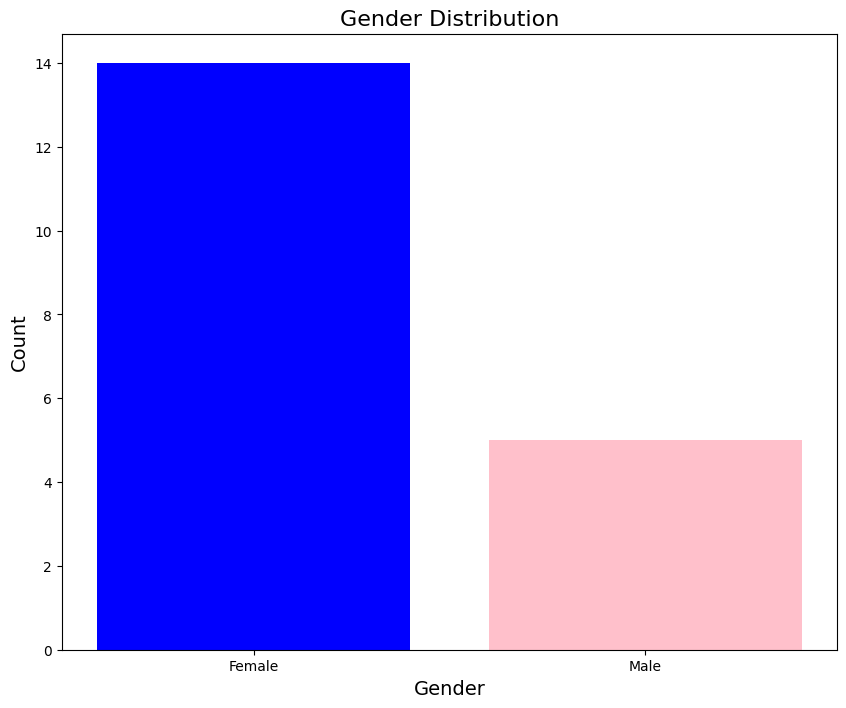

In [15]:
# Gender distribution
plt.figure(figsize=(10, 8))
gender_counts = emotions_df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

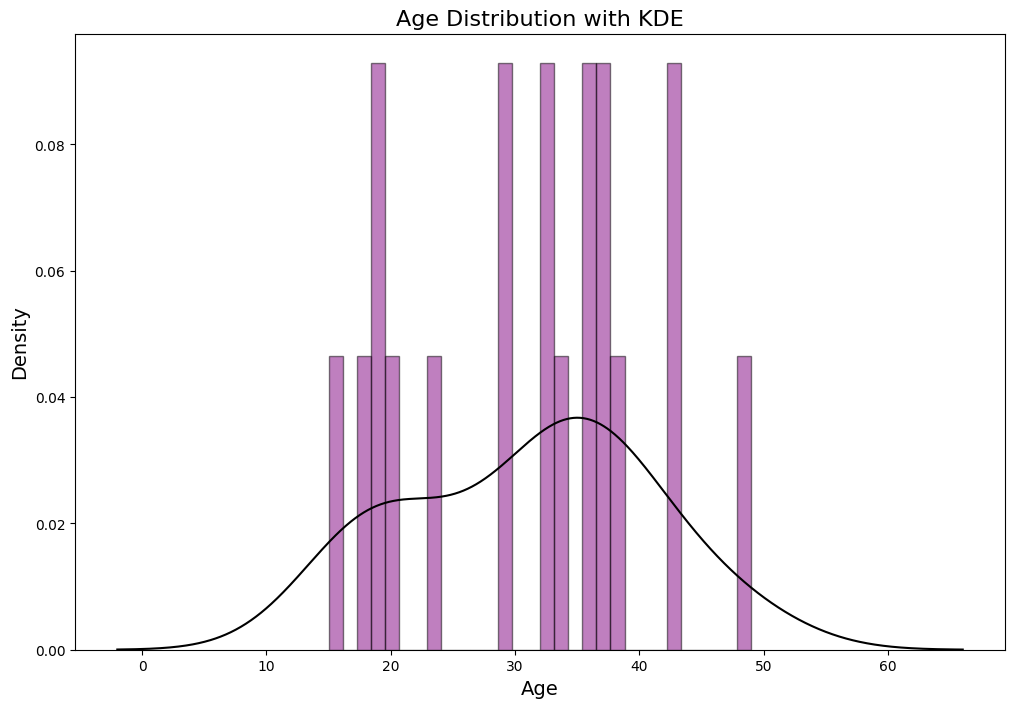

In [16]:
# Age distribution with KDE
plt.figure(figsize=(12, 8))
emotions_df['age'].plot(kind='hist', bins=30, density=True, alpha=0.5, color='purple', edgecolor='black')
emotions_df['age'].plot(kind='kde', color='black')
plt.title('Age Distribution with KDE', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<Figure size 1000x800 with 0 Axes>

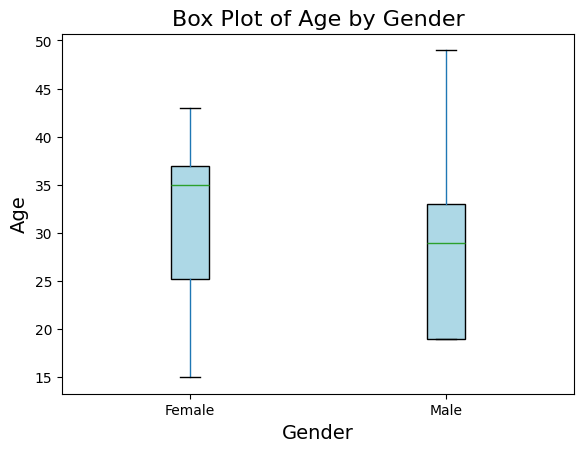

In [17]:
# Box plot of age by gender
plt.figure(figsize=(10, 8))
emotions_df.boxplot(column='age', by='gender', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age by Gender', fontsize=16)
plt.suptitle('')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([1, 2], ['Female', 'Male'])
plt.show()

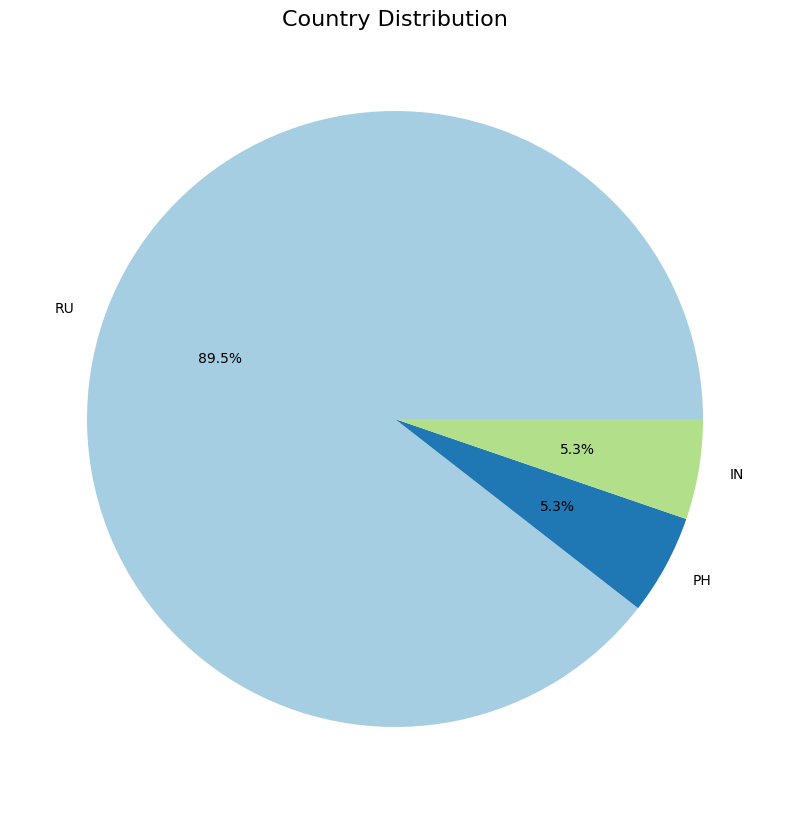

In [18]:
# Pie chart for country distribution
country_counts = emotions_df['country'].value_counts()
plt.figure(figsize=(12, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(country_counts))))
plt.title('Country Distribution', fontsize=16)
plt.show()

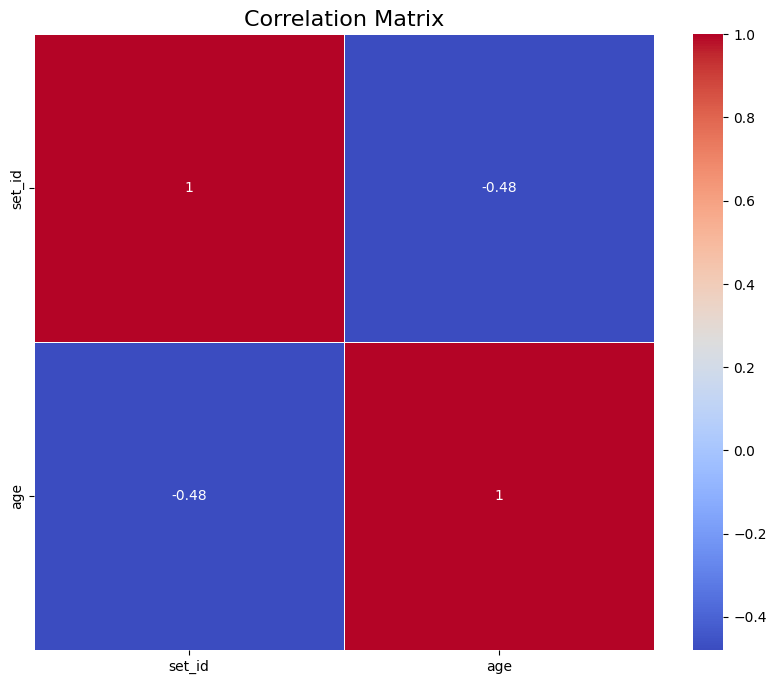

In [19]:
plt.figure(figsize=(10, 8))
numeric_cols = emotions_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [20]:
# Encode the gender column
label_encoder = LabelEncoder()
emotions_df['gender'] = label_encoder.fit_transform(emotions_df['gender'])

In [21]:
# Function to load and preprocess images from subdirectories
def load_data():
    images = []
    labels = []

    images_dir = os.path.join(DATA_DIR, "images")  # Path to images

    for label_folder in os.listdir(images_dir):
        folder_path = os.path.join(images_dir, label_folder)

        # Skip if it's not a directory
        if not os.path.isdir(folder_path):
            continue

        try:
            # Get numeric label from the folder name
            label_num = int(label_folder)

            # Check if label_num is a valid index
            if 0 <= label_num < len(EMOTIONS):
                for img_file in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_file)

                    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img_array is not None:
                        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                        images.append(img_resized)
                        labels.append(label_num)
                    else:
                        print(f"⚠️ Could not read image: {img_path}")
            else:
                print(f"❌ Invalid label number: {label_num} in folder {label_folder}")

        except ValueError:
            print(f"❌ Folder name is not a valid number: {label_folder}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()
print(f"✅ Loaded {len(images)} images with shape {images.shape}")




❌ Invalid label number: 14 in folder 14
❌ Invalid label number: 16 in folder 16
❌ Invalid label number: 15 in folder 15
❌ Invalid label number: 8 in folder 8
❌ Invalid label number: 11 in folder 11
❌ Invalid label number: 17 in folder 17
❌ Invalid label number: 18 in folder 18
❌ Invalid label number: 9 in folder 9
❌ Invalid label number: 12 in folder 12
❌ Invalid label number: 10 in folder 10
❌ Invalid label number: 13 in folder 13
✅ Loaded 64 images with shape (64, 48, 48)


In [22]:
images = images / 255.0

# Encode labels to categorical
labels_categorical = to_categorical(labels, num_classes=len(EMOTIONS))

In [23]:
# Check the distribution of the labels to ensure balance
print("Distribution of emotions:")
print(pd.Series(labels).value_counts())

Distribution of emotions:
6    8
7    8
0    8
3    8
1    8
2    8
4    8
5    8
Name: count, dtype: int64


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [25]:
# Reshape for the model
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [26]:
# Model Training
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(EMOTIONS), activation='softmax')  # Ensure the correct number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 856ms/step - accuracy: 0.0235 - loss: 2.0905 - val_accuracy: 0.3077 - val_loss: 2.0521
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.2167 - loss: 2.0609 - val_accuracy: 0.2308 - val_loss: 2.0209
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 461ms/step - accuracy: 0.1671 - loss: 2.0403 - val_accuracy: 0.1538 - val_loss: 2.0167
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step - accuracy: 0.1593 - loss: 2.0298 - val_accuracy: 0.3077 - val_loss: 2.0106
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.3133 - loss: 1.9727 - val_accuracy: 0.2308 - val_loss: 1.9840
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.3002 - loss: 1.9291 - val_accuracy: 0.2308 - val_loss: 1.9219
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.4046 - loss: 1.8322 - val_accuracy: 0.4615 - val_loss: 1.8329
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step - accuracy: 0.4230 - loss: 1.7875 - val_accuracy: 0.5385 - val_loss:

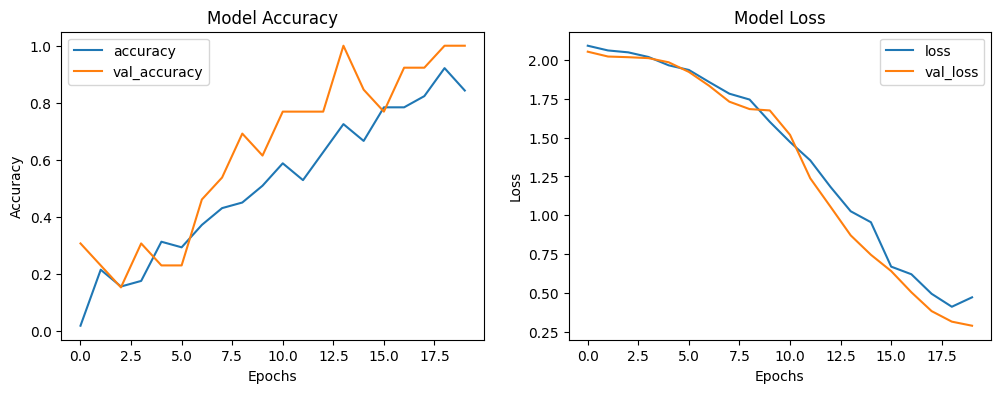

In [27]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


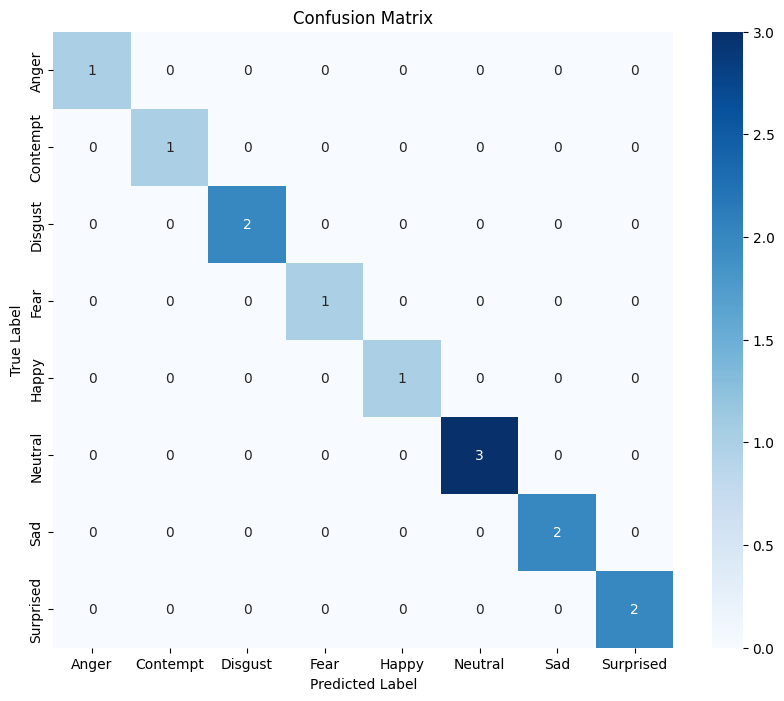

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         1
     Disgust       1.00      1.00      1.00         2
        Fear       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         3
         Sad       1.00      1.00      1.00         2
   Surprised       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [28]:
# Model Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_df = pd.DataFrame(cm, index=EMOTIONS, columns=EMOTIONS)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=EMOTIONS)
print(report)

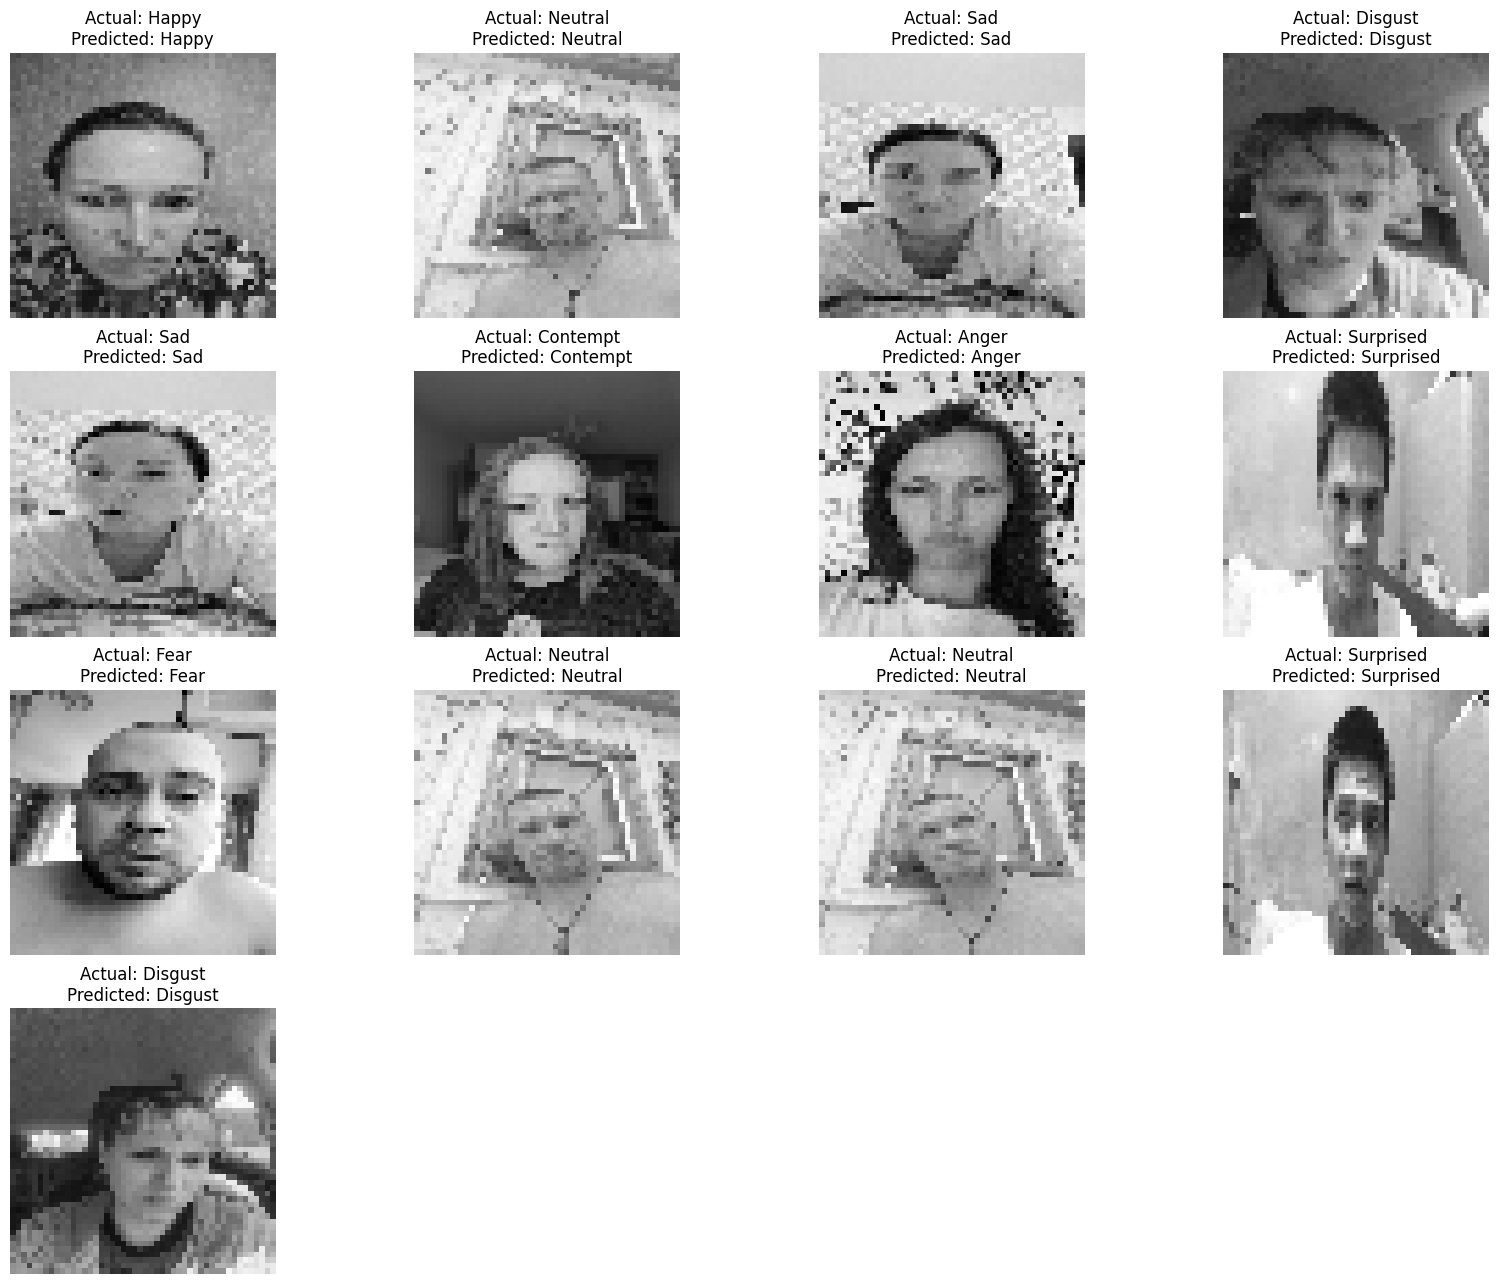

In [90]:
# Display images with predicted and actual labels
num_images = min(20, len(X_test))
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(5, 4, i + 1)
    img = (X_test[i] * 255).astype(np.uint8)  # Convert back to uint8
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title(f"Actual: {EMOTIONS[y_true[i]]}\nPredicted: {EMOTIONS[y_pred_classes[i]]}")
    plt.axis('off')
plt.show()